<a href="https://colab.research.google.com/github/xanasa14/MLImplementations/blob/master/HeartPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import random
%matplotlib inline
#https://towardsdatascience.com/the-art-of-finding-the-best-features-for-machine-learning-a9074e2ca60d
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


#importing our cancer dataset
dataset = pd.read_csv('/content/drive/MyDrive/HeartData/heart.csv')
dataset.head()




,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


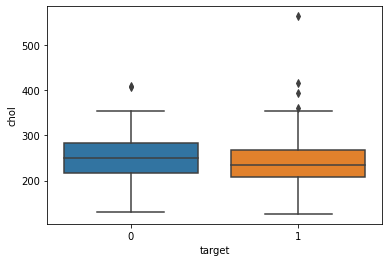

In [7]:
dataset.head()
sns.boxplot(x='target', y='chol', data=dataset)


In [8]:
#checking all nulls 
dataset.isnull().sum()
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
X  = dataset

Y = dataset['target']


X = X.drop('target', 1)
print(X)
print(Y)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target

In [11]:
# Splitting the dataset into the Training set and Test set
print( type(X))
print(type(Y))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=41)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier






#Using Logistic Regression Algorithm to the Training Set
models = [LogisticRegression(), 
          KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
          SVC(kernel = 'linear'),
          SVC(kernel = 'rbf'),
          GaussianNB(),
          RandomForestClassifier(n_estimators = 10, criterion = 'entropy'),
          DecisionTreeClassifier(criterion = 'entropy', ),
          AdaBoostClassifier(n_estimators=100)
          ]

CV = 5 
entries = []
for model in models: 
    counter = 2
    model_name = model.__class__.__name__
    for i in range(len(entries)):
      if (str(model_name) in entries[i]):
       model_name = model_name + "V" + str(counter)
    classifier = model

    clf = classifier.fit(X_train, y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, Y_pred)
    entries.append((model_name, accuracy*100))
print(len(entries))
entries
      


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


8


[('LogisticRegression', 82.41758241758241),
 ('KNeighborsClassifier', 69.23076923076923),
 ('SVC', 82.41758241758241),
 ('SVCV2', 62.637362637362635),
 ('GaussianNB', 86.81318681318682),
 ('RandomForestClassifier', 84.61538461538461),
 ('DecisionTreeClassifier', 73.62637362637363),
 ('AdaBoostClassifier', 80.21978021978022)]

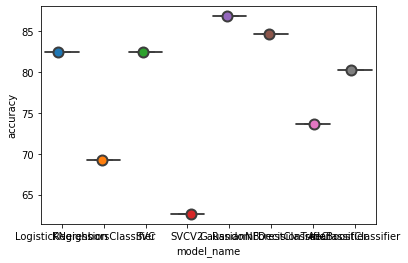

In [14]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [16]:
import sklearn.metrics as sk_metrics
import seaborn as sns
from sklearn.metrics import classification_report


#training a logistics regression model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print("Accuracy = "+ str(accuracy_score(y_test,predictions)))

target_names = ['Negative','Positive']

print(classification_report(y_test,predictions.round(),target_names=target_names))
matrix = confusion_matrix(predictions.round(), y_test,)

print(matrix)

Accuracy = 0.8241758241758241
              precision    recall  f1-score   support

    Negative       0.84      0.81      0.83        47
    Positive       0.80      0.84      0.82        44

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

[[38  7]
 [ 9 37]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
matrix = confusion_matrix(predictions.round(), y_test,)

print(matrix)

[[38  7]
 [ 9 37]]


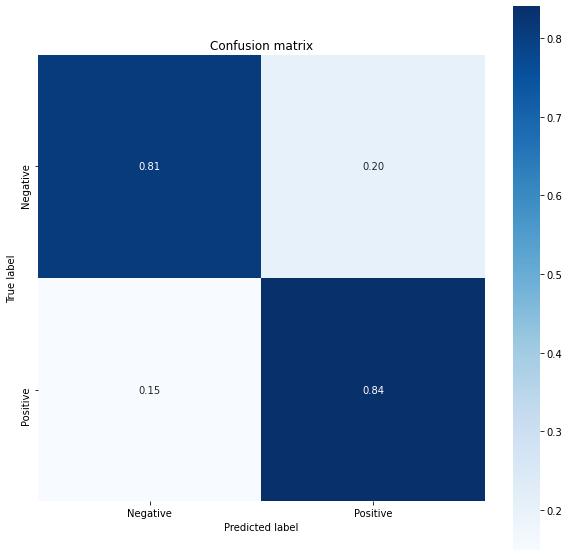

In [21]:
def show_confusion_matrix(test_labels, predictions):
  """Compute confusion matrix and normalize."""
  plt.figure(figsize=(10,10))
  confusion = sk_metrics.confusion_matrix(
    test_labels, predictions)
  confusion_normalized = confusion.astype("float") / confusion.sum(axis=1)
  axis_labels = target_names
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.2f', square=True  )
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

show_confusion_matrix(y_test, predictions.round())

[0.25 0.02 0.04 0.1  0.16 0.   0.01 0.21 0.01 0.06 0.02 0.08 0.04]


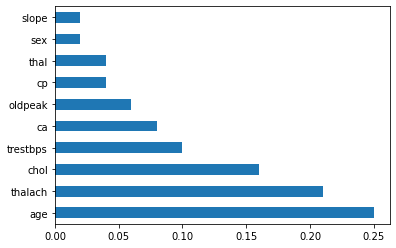

In [22]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()